[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


---LightGBM ---
Accuracy: 95.12%
Confusion Matrix:
 [[98  4]
 [ 6 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.96      0.94      0.95       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205


--- Random Forest ---
Accuracy: 81.95%
Confusion Matrix:
 [[76 26]
 [11 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205


 Best Model: LightGBM with Accuracy: 95.12%


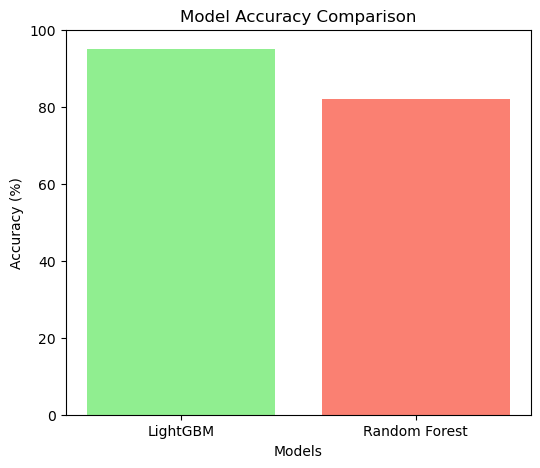

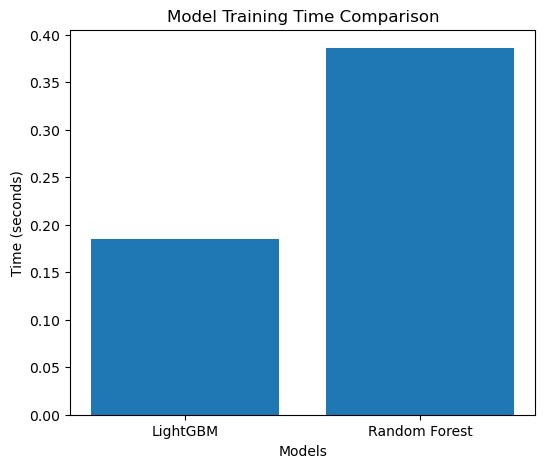

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("heart.csv")  
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
          'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

train_times = {}
results = {}

start_time = time.time()
lgb = LGBMClassifier(n_estimators=60, learning_rate=0.05, random_state=42)
lgb.fit(X_train, y_train)
end_time = time.time()
train_times['LightGBM'] = end_time - start_time
lgb_pred = lgb.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
results['LightGBM'] = lgb_acc

start_time = time.time()
rf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=42)
rf.fit(X_train, y_train)
end_time = time.time()
train_times['Random Forest'] = end_time - start_time
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_acc

print("---LightGBM ---")
print(f"Accuracy: {lgb_acc*100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred))
print("Classification Report:\n", classification_report(y_test, lgb_pred))

print("\n--- Random Forest ---")
print(f"Accuracy: {rf_acc*100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

if lgb_acc > rf_acc:
    print(f"\n Best Model: LightGBM with Accuracy: {lgb_acc*100:.2f}%")
else:
    print(f"\n Best Model: Random Forest with Accuracy: {rf_acc*100:.2f}%")

plt.figure(figsize=(6,5))
plt.bar(results.keys(), [v*100 for v in results.values()], color=['lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(6,5))
plt.bar(train_times.keys(), train_times.values())
plt.title("Model Training Time Comparison")
plt.xlabel("Models")
plt.ylabel("Time (seconds)")
plt.show()
